<a href="https://colab.research.google.com/github/kixtter/AnalisisInteligenteDatos/blob/main/Unidad%201/Caso_8_Comparar_modelos_lineal_y_polinomico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Caso 8. Comparar modelos lineal y polinómica

##Objetivo
Construir modelos de regresión lineal simple y polinómica con la finalidad de evaluar la métrica R Square y determinar la utilidad de las predicciones en cada modelo.

##Descripción

*  Cargar librerías
*  Cargar datos
*  Identificar variables de interés: variable independiente y la variable dependiente de los datos
*  Construir datos de entrenamiento
*  Construir datos de validación
*  Modelo lineal simple
  *  Construir el modelo
  *  Evaluar el modelo con R Square o coeficiente de determinación
  *  Interpretar el modelo
  *  Predicciones
*  Modelo polinómico de segunda potencia
  *  Construir el modelo polinóminco de segunda potencia
  *  Evaluar el modelo con R Square o coeficiente de determinación
  *  Interpretar el modelo
  *  Predicciones
*  Modelo polinómico de quinta potencia
  *  Construir un modelo polinómico de quinta potencia
  *  Evaluar el modelo con R Square o coeficiente de determinación
  *  Interpretar el modelo
  *  Predicciones
*  Interpretación del caso

##Desarrollo

###Cargar librerías

In [38]:
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Preprocesado y modelado
from scipy.stats import pearsonr #Para correlación
from sklearn.linear_model import LinearRegression #Para regresión
from sklearn.model_selection import train_test_split #Partir datos
from sklearn.metrics import r2_score #R Square
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

##Cargar los datos

In [39]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.fifa.csv", encoding= 'unicode_escape')

datos[['Overall', 'Valor']]

,Overall,Valor
0,94,110500000
1,94,77000000
2,92,118500000
3,91,72000000
4,91,102000000
...,...,...
17950,47,60000
17951,47,60000
17952,47,60000
17953,47,60000


Las variables de interés son **Overall** como variable independiente que significa el valor cuantitativo entre 0 y 100 de un jugador de futbol a nivel internacional y la variable **Valor** que es el estimado económico que vale un jugador de fútbol a nivel mundial.

In [40]:
datos[['Overall', 'Valor']].describe()

,Overall,Valor
count,17955.000000,1.795500e+04
mean,66.228237,2.444530e+06
std,6.921015,5.626715e+06
min,46.000000,1.000000e+04
25%,62.000000,3.250000e+05
50%,66.000000,7.000000e+05
75%,71.000000,2.100000e+06
max,94.000000,1.185000e+08


Con esta descripción básica de los datos podemos ver que el promedio de valoracion de jugadores(Overall) esta en 66.22 lo cual indica que la mayoria esta por encima de la media lo cual da buenas impresiones y con respecto a su promedio de valoración económica esta en los 2.5 millones de dolares lo cual indica que tienen un buen valor para poder ser contratados.

##Diagrama de dispersión de los datos

Se muestra el diagrama con todo el conjunto de datos

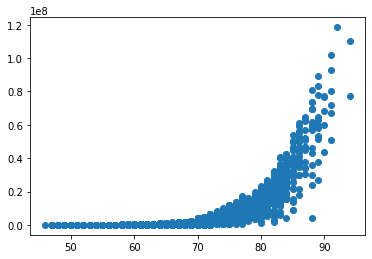

In [41]:
Overall = datos['Overall'].values.reshape(-1, 1) #Variable independiente
Valor = datos['Valor'].values.reshape(-1, 1)#Variable dependiente
plt.scatter(Overall, Valor)

##Construir datos de entrenamiento


In [42]:
entrena_Overall, valida_Overall, entrena_Valor, valida_Valor = train_test_split(
    Overall,
    Valor,
    train_size = 0.8,
    random_state = 2021,
    shuffle = True
)

###Datos de entrenamiento

In [43]:
entrenamiento = pd.DataFrame(np.concatenate((entrena_Overall, entrena_Valor), axis = 1))
entrenamiento.columns = ['Overall', 'Valor']
entrenamiento

,Overall,Valor
0,49,40000
1,59,220000
2,53,90000
3,69,140000
4,60,290000
...,...,...
14359,60,325000
14360,57,220000
14361,73,3700000
14362,52,110000


###Validación

In [44]:
validacion = pd.DataFrame(np.concatenate((valida_Overall, valida_Valor), axis = 1))
validacion.columns = ['Overall', 'Valor']
validacion

,Overall,Valor
0,75,7500000
1,62,450000
2,63,400000
3,74,5000000
4,66,400000
...,...,...
3586,70,1300000
3587,64,500000
3588,62,325000
3589,60,210000


###Diagrama de dispersión con datos de entrenamiento

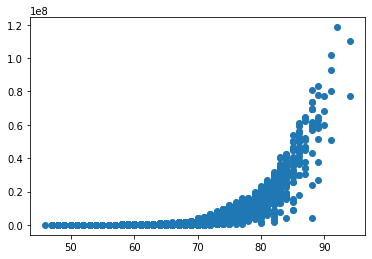

In [45]:
Overall = entrenamiento['Overall'].values.reshape(-1, 1)
Valor = entrenamiento['Valor'].values.reshape(-1, 1)
plt.scatter(Overall, Valor)

##Modelo de regresión lineal simple

###Construyendo el modelo de regresión lineal simple

In [46]:
modelo_lin = LinearRegression()
modelo_lin.fit(X = entrena_Overall.reshape(-1, 1), y = entrena_Valor)

y_pred = modelo_lin.predict(Overall)

###Evaluando el modelo de regresión lineal simple

In [47]:
print('Coeficiente de la intercepción:', modelo_lin.intercept_)
print('Coeficiente de la pendiente:', modelo_lin.coef_)
print('Coeficiente de determinación R^2 o R Square:', modelo_lin.score(X = entrena_Overall, y = entrena_Valor))

Coeficiente de la intercepción: [-31818186.001252]
Coeficiente de la pendiente: [[517268.60261868]]
Coeficiente de determinación R^2 o R Square: 0.3931398886597335


Se construye la recta de regresión con los datos de entrenamiento y el modelo construido a partir de estos datos.

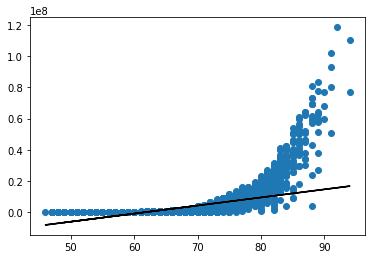

In [48]:
plt.scatter(Overall, Valor)
plt.plot(Overall, y_pred, color = 'black')
plt.show()

##Interpretación del modelo de regresión lineal simple

Como podemos ver en la gráfica la relación que hay entre la variable independiente **Overall** y la variable dependiente **Valor** se comporta como una curva y muy poco de manera lineal.

Haciendo uso del modelo de regresión lineal presenta un valor de R Square del 39.31% significa que la variable **Overall** representa ese porcentaje sobre la variable **Valor**.

Las predicciones que se puedan llevar a cabo estan muy lejos de lo que son los valores reales.

###Predicciones de regresión lineal simple

Se elige un valor del conjunto de datos de validación para comparar el valor real con el valor de la predicción del modelo de regresión simple.

Se elige el registro 10, 500 y 1000 del conjunto de datos de validación.

In [49]:
registro = 10
print(validacion.loc[registro])

a_predecir = validacion.loc[registro, 'Overall']
print(a_predecir)

pred_lin = modelo_lin.predict([[a_predecir]])

print('La predicción con el modelo de regresión lineal simple haciendo uso del valor',a_predecir, 'da como resultado',float(pred_lin), '\nEl valor real conforme a los datos de validación es de:', validacion.loc[registro, 'Valor'])

Overall        57
Valor      160000
Name: 10, dtype: int64
57
La predicción con el modelo de regresión lineal simple haciendo uso del valor 57 da como resultado -2333875.6519870013 
El valor real conforme a los datos de validación es de: 160000


In [50]:
registro = 500
print(validacion.loc[registro])

a_predecir = validacion.loc[registro, 'Overall']
print(a_predecir)

pred_lin = modelo_lin.predict([[a_predecir]])

print('La predicción con el modelo de regresión lineal simple haciendo uso del valor',a_predecir, 'da como resultado',float(pred_lin), '\nEl valor real conforme a los datos de validación es de:', validacion.loc[registro, 'Valor'])

Overall          79
Valor      11500000
Name: 500, dtype: int64
79
La predicción con el modelo de regresión lineal simple haciendo uso del valor 79 da como resultado 9046033.60562405 
El valor real conforme a los datos de validación es de: 11500000


In [51]:
registro = 1000
print(validacion.loc[registro])

a_predecir = validacion.loc[registro, 'Overall']
print(a_predecir)

pred_lin = modelo_lin.predict([[a_predecir]])

print('La predicción con el modelo de regresión lineal simple haciendo uso del valor',a_predecir, 'da como resultado',float(pred_lin), '\nEl valor real conforme a los datos de validación es de:', validacion.loc[registro, 'Valor'])

Overall        58
Valor      230000
Name: 1000, dtype: int64
58
La predicción con el modelo de regresión lineal simple haciendo uso del valor 58 da como resultado -1816607.0493683182 
El valor real conforme a los datos de validación es de: 230000


##Modelo polinómico de segundo nivel

Se crea un modelo polinómico con los mismos datos de entrenamiento y evaluar el R Square así como las predicciones con los datos de validación.



In [52]:
from sklearn.preprocessing import PolynomialFeatures

polyn = PolynomialFeatures(degree = 2)

x_poly = polyn.fit_transform(entrena_Overall)

print(entrena_Overall)
print(x_poly)

[[49]
 [59]
 [53]
 ...
 [73]
 [52]
 [69]]
[[1.000e+00 4.900e+01 2.401e+03]
 [1.000e+00 5.900e+01 3.481e+03]
 [1.000e+00 5.300e+01 2.809e+03]
 ...
 [1.000e+00 7.300e+01 5.329e+03]
 [1.000e+00 5.200e+01 2.704e+03]
 [1.000e+00 6.900e+01 4.761e+03]]


Luego se crea el modelo de regresión polinomial de segundo nivel

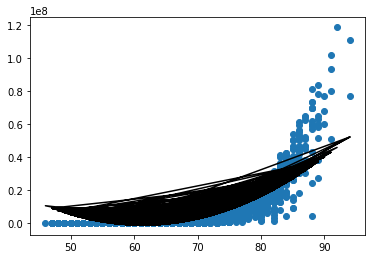

RMSE: 2796715.519337346
R2: 0.7594680604382035


In [55]:
modelo_pol2 = LinearRegression()
modelo_pol2.fit(x_poly, entrena_Valor)

y_pred = modelo_pol2.predict(x_poly)
# print(y_pred)

plt.scatter(entrena_Overall, entrena_Valor)
plt.plot(entrena_Overall, y_pred, color = 'black')
plt.show()

rmse = np.sqrt(mean_squared_error(Valor, y_pred))
r2 = r2_score(entrena_Valor, y_pred)
print('RMSE:', str(rmse))
print('R2:', str(r2))

##Interpretación del modelo polinómico de segundo nivel

El valor de R Square es de 75.94% lo cual representa que este modelo tiene gran presencia dentro de los datos de entrenamiento, de esta forma se tiene la confianza de que la precisión al predecir un valor real es mucho mayor que usando el modelo de regresión lineal simple.

###Predicciones con el modelo de regresión polinomial de segundo nivel

In [56]:
registro = 10
print(validacion.loc[registro])

a_predecir = validacion.loc[registro, 'Overall']

pred2 = modelo_pol2.predict(polyn.fit_transform([[a_predecir]]))
print('La predicción con el modelo de regresión polinomial de segundo nivel haciendo uso del valor',a_predecir, 'da como resultado',float(pred2), '\nEl valor real conforme a los datos de validación es de:', validacion.loc[registro, 'Valor'])

Overall        57
Valor      160000
Name: 10, dtype: int64
La predicción con el modelo de regresión polinomial de segundo nivel haciendo uso del valor 57 da como resultado -238130.13155829906 
El valor real conforme a los datos de validación es de: 160000


In [57]:
registro = 500
print(validacion.loc[registro])

a_predecir = validacion.loc[registro, 'Overall']

pred2 = modelo_pol2.predict(polyn.fit_transform([[a_predecir]]))
print('La predicción con el modelo de regresión polinomial de segundo nivel haciendo uso del valor',a_predecir, 'da como resultado',float(pred2), '\nEl valor real conforme a los datos de validación es de:', validacion.loc[registro, 'Valor'])

Overall          79
Valor      11500000
Name: 500, dtype: int64
La predicción con el modelo de regresión polinomial de segundo nivel haciendo uso del valor 79 da como resultado 14453190.177258044 
El valor real conforme a los datos de validación es de: 11500000


In [63]:
registro = 1000
print(validacion.loc[registro])

a_predecir = validacion.loc[registro, 'Overall']

pred2 = modelo_pol2.predict(polyn.fit_transform([[a_predecir]]))
print('La predicción con el modelo de regresión polinomial de segundo nivel haciendo uso del valor',a_predecir, 'da como resultado',float(pred2), '\nEl valor real conforme a los datos de validación es de:', validacion.loc[registro, 'Valor'])

Overall        58
Valor      230000
Name: 1000, dtype: int64
La predicción con el modelo de regresión polinomial de segundo nivel haciendo uso del valor 58 da como resultado -614470.1224907041 
El valor real conforme a los datos de validación es de: 230000


##Modelo polinómico de quinto nivel

In [65]:
polyn = PolynomialFeatures(degree=5)

x_poly = polyn.fit_transform(entrena_Overall)

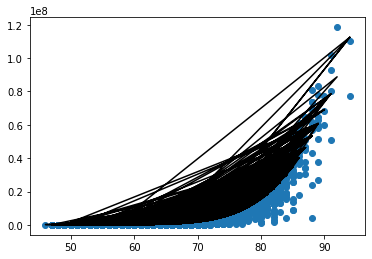

RMSE: 1791820.4787536587
R2: 0.9012663573094013


In [68]:
modelo_pol5 = LinearRegression()
modelo_pol5.fit(x_poly, entrena_Valor)

y_pred = modelo_pol5.predict(x_poly)

plt.scatter(entrena_Overall, entrena_Valor)
plt.plot(entrena_Overall, y_pred, color='black')
plt.show()

rmse = np.sqrt(mean_squared_error(entrena_Valor, y_pred))
r2 = r2_score(entrena_Valor, y_pred)
print('RMSE:', str(rmse))
print('R2:', str(r2))

##Interpretación del modelo de regresión polinomial de nivel 5

El valor de R Square ahora es del 90.12% lo cual es mucho mayor que los anteriores modelos así de esta forma las predicciones serán mucho más precisas y más acordes a los datos reales, incluso es posible que usando un nivel más alto se pueda conseguir una mejor precisión en la predicción del valor económico de un jugador pero con esto ya tenemos una mayor seguridad para poder llegar aun mejor estimacion.

###Predicciones con el modelo de regresión polinómico de quinto nivel

In [70]:
registro = 10
print(validacion.loc[registro])

a_predecir = validacion.loc[registro, 'Overall']

pred5 = modelo_pol5.predict(polyn.fit_transform([[a_predecir]]))
print('La predicción con el modelo de regresión polinomial de quinto nivel haciendo uso del valor',a_predecir, 'da como resultado',float(pred5), '\nEl valor real conforme a los datos de validación es de:', validacion.loc[registro, 'Valor'])

Overall        57
Valor      160000
Name: 10, dtype: int64
La predicción con el modelo de regresión polinomial de quinto nivel haciendo uso del valor 57 da como resultado 196483.466246292 
El valor real conforme a los datos de validación es de: 160000


In [71]:
registro = 500
print(validacion.loc[registro])

a_predecir = validacion.loc[registro, 'Overall']

pred5 = modelo_pol5.predict(polyn.fit_transform([[a_predecir]]))
print('La predicción con el modelo de regresión polinomial de quinto nivel haciendo uso del valor',a_predecir, 'da como resultado',float(pred5), '\nEl valor real conforme a los datos de validación es de:', validacion.loc[registro, 'Valor'])

Overall          79
Valor      11500000
Name: 500, dtype: int64
La predicción con el modelo de regresión polinomial de quinto nivel haciendo uso del valor 79 da como resultado 12940891.805972591 
El valor real conforme a los datos de validación es de: 11500000


In [72]:
registro = 1000
print(validacion.loc[registro])

a_predecir = validacion.loc[registro, 'Overall']

pred5 = modelo_pol5.predict(polyn.fit_transform([[a_predecir]]))
print('La predicción con el modelo de regresión polinomial de quinto nivel haciendo uso del valor',a_predecir, 'da como resultado',float(pred5), '\nEl valor real conforme a los datos de validación es de:', validacion.loc[registro, 'Valor'])

Overall        58
Valor      230000
Name: 1000, dtype: int64
La predicción con el modelo de regresión polinomial de quinto nivel haciendo uso del valor 58 da como resultado 220752.49816434085 
El valor real conforme a los datos de validación es de: 230000


#Interpretación de todo el caso

Para poder saber que tipo de modelo hay que aplicar a los datos con los que se cuentan hay que conocer la dispersión de estos, haciendo esto de forma gráfica se puede observar la tendencia de los datos y así poder determinar si haciendo uso del modelo de regresión lineal simple o del modelo de regresión polinomial nos acercará a los valores reales y de esta forma cuando queramos estimar un valor solo va a faltar tener el datos de entrada y de esta forma conoceremos un resultado muy cercano a la realidad.

Para poder determinar que modelo es el más adecuado podemos probar hasta que demos con el indicado o con ciertas condiciones poder saber el que mejor de adapta a nuestras necesidades.

En esta caso se uso la regresión lineal simple, regresión polinomial de segundo nivel y la regresión polinomial de quinto nivel, se hicieron pruebas con las tres y hasta que llegamos al modelo del quinto nivel pudimos observar valores más cercamos a los reales, este sentido, a los valores de validación, esto nos indica que este ultimo intento es el mas adecuado a lo que buscamos pero siempre puede haber uno mejor.